In [1]:
import sys
sys.dont_write_bytecode = True #不生成pychache文件，要放在导入模块前才生效

import os
import scipy.signal as signal
import scipy.io as sio
import matplotlib.pyplot as plt
import soundfile
import torchaudio
import torchaudio.transforms as T
import torch
import numpy as np
import random
import math

fs = 16000

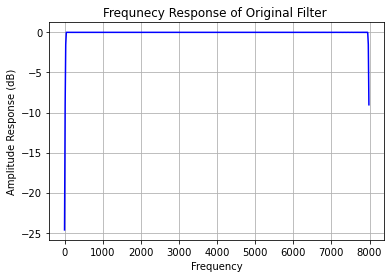

[========================================================================] 100%


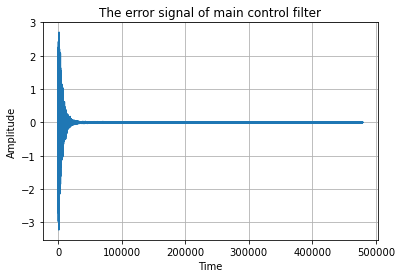

In [2]:
"""
# Pretraining a control filter with 20Hz-7980Hz and divide it into 15 sub filters

%run Pretraining_sub_control_filters.py
"""

In [ ]:
"""
# Generate synthesized noise dataset: 80000 random noises

from DataSet_construction import Generating_Synthetic_NoiseDataset

Folder_name_list_of_data_set =['Dataset/Synthesized_Dataset/Training_data', 'Dataset/Synthesized_Dataset/Validate_data', 'Dataset/Synthesized_Dataset/Testing_data']
N_sample_list =[80000, 2000, 2000]
for Folder_name_of_data_set, N_sample in zip(Folder_name_list_of_data_set,N_sample_list):
    if not os.path.exists(Folder_name_of_data_set):
        Generating_Synthetic_NoiseDataset(N_sample=N_sample, Folder_name=Folder_name_of_data_set)
    else:
        print(Folder_name_of_data_set + 'exists !!!')
        
# generated 80000 training data, 2000 Validate data, 2000 test data. Each folder has a csv file.

"""

In [ ]:
# by batch (batch=1000, step_size=0.001, SNR=30)
# Hard Label noise dataset using the 15 pre-trained sub filters
from Automatic_Hard_Label_Subfilters_batch import Automatic_label

path_mat = 'models/Pretrained_Sub_Control_filters.mat'

Labeler = Automatic_label(sufix='.wav', folder_path='Dataset/Synthesized_Dataset/Training_data', path_mat=path_mat, Index_file='Hard_Index.csv', threshold=0.5)
Labeler.label()

In [ ]:

# by batch (batch=1000, step_size=0.001, SNR=30)
# Soft Label noise dataset using the 15 pre-trained sub filters
from Automatic_Soft_Label_Subfilters_batch import Automatic_label

path_mat = 'models/Pretrained_Sub_Control_filters.mat'

Labeler = Automatic_label(sufix='.wav', folder_path='Dataset/Synthesized_Dataset/Training_data', path_mat=path_mat, Index_file='Soft_Index.csv')
Labeler.label()